---

[//]: # "Header"

<p style="text-align: left;  font-size:18pt; LINE-HEIGHT:30px;">
    <span style="float: left">
     Technische Hochschule Ingolstadt<br>
     Prof. Dr. Sören Gröttrup <br>
     Laura Dietl
    </span>
    <span style="float: right;">
       Machine Learning 2<br>
        <span style="float: right;">SS 2025</span>
    </span>
</p>

[//]: # "Header Aufgabenblatt"
<br>
<p style="text-align: center;  font-size:18pt; LINE-HEIGHT:30px;">
     <span style="font-weight: bold;">Aufgabenblatt 1</span><br>
     Themen: Mini-Batch, Lernrate, Konvergenz<br>
     Abgabetermin: 03.04.2025, 23:59 Uhr <br>
     Punkte: 24
</p>


---

**Namen:** Emelie Hauck, Conrad Christoph

---

## Daten
Der Datensatz `gt.csv` (zu finden auf der Moodle-Seite des Praktikums (https://moodle.thi.de/course/view.php?id=6824)) ist eine etwas abgewandelte und bearbeitete Version des Datensatzes aus dem UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set). 

Der Datensatz enthält 36733 Messpunkte von je 11 Sensoren einer Gasturbine im Nordwesten der Türkei. Die einzelnen Werte sind dabei jeweils Aggregate (Summe oder Mittelwert) über eine Stunde. Die Sensordaten diesen dazu die Gasemissionender Turbine, insb. CO und NOx (NO & NO2), zu messen.

Das File `gt_norm` enthält bereits den normierten udn aufbereiteten Datensatz, geplittet in Training und Test. Die Daten liegen jeweils bereits als TensorDataset bereit und können direkt mit einem DataLoader verarbeitet werden.

## Ziel des Aufgabenblattes
Trainieren Sie mehrere Neuronale Netze für unterschiedliche Batch-Größen und Lernraten, um ein besseres Verständnis davon zu bekommen, was diese Hyperparameter für einen Einfluss auf das Lernen haben.

In [2]:
# Packages
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

import time

plt.style.use('ggplot')

### Load data

In [3]:
# Load data
file_path = "./Daten Blatt 1/gt_norm"
data = torch.load(file_path, weights_only=False)

In [4]:
train_data = data.get("train_data")
test_data = data.get("test_data")

In [5]:
type(train_data), type(test_data)

(torch.utils.data.dataset.TensorDataset,
 torch.utils.data.dataset.TensorDataset)

In [6]:
# Größe des Trainings und Testset
print("Größe des Trainingssets: ", len(train_data))
print("Größe des Testsets: ", len(test_data))

Größe des Trainingssets:  29386
Größe des Testsets:  7347


In [7]:
# Anzahl an Feature
nfeatures = len(train_data[0][0])
print("Anzahl an Feature: ", nfeatures)

Anzahl an Feature:  9


## Mini-Batches in PyTorch / DataLoader

Die Einteilung eines Datensatzes in (Mini-)Batches kann über den so genannten `DataLoader` und folgenden Code erfolgen:

```python
train_loader = torch.utils.data.DataLoader(
      train_data,
      batch_size=b, shuffle=True)
```

Ein TensorDataset (hier `train_data`) wird dabei in Batches gleicher Größe (hier `b`) eingeteilt. Der Parameter `shuffle=True` garantiert, dass in jeder Epoche die Einteilung in die Mini-Batches neu gezogen wird. In jeder Epoche haben wir also unterschiedliche Mini-Batches.

Zurückgegeben wrid ein iterierbares Objekt (`train_loader`). Mittels einer `for`-Schleife kann jetzt über die Batches iteriert werden und für einen Batch das Gradientenabstiegsverfahren durchgeführt werden.

**Iteration über die Batches**
```python
for batch_idx, (data, target) in enumerate(train_loader):
    ...
```

`data` ist der Tensor mit den Features und `target` der Tensor der Zielvariable für die Sampels des jeweiligen Mini-Batches. `batch_idx` ist nur der Index des jeweiligen Batches in der Epoche.

## Aufgabe 1 (Batch-Size und Learnrate) [18 Punkte]
In dieser Aufgabe sollen Sie ein Neuronales Netz trainieren mit unterschiedlicher Auswahl an Batch-Größe sowie Lernrate, und analysieren was dies für Auswirkungen auf das Lernen hat.

1. Definieren Sie ein Neuronales Netz `Net()`. Das Netz soll dabei 2 Hidden-Layer haben, jeweils mit ReLU-Aktivierungsfunktion. Die Anzahl der Neuronen der Hidden-Layer ist 16 und 8.
1. Schreiben eine Funktion `train(network, train_loader)`, welche das Neuronale Netz `network` über eine Epoche mittel des Mini-Batch Verfahrens trainiert. `train_loader` ist dabei der  DataLoader für dieMini-Batch Einteilung.
1. Schreiben Sie eine Funktion `calc_loss(network, data_loader)`, welche für eine Neuronales Netz `network` den mittleren quadratischen Fehler (MSE) für die Daten, welche mittels DataLoader `data_loader` übergeben werden, bestimmt.
1. Trainieren Sie das Neuronale Netz `Net()` aus 1. mittels Gradientenabstieg `torch.optim.SGD()` nach dem Batch-Verfahren auf den obigen Daten `gt`. Verwenden Sie als Lernrate `learning_rate = 0.001` und als Verlustfunktion den L2-Loss. Wie groß ist der MSE für Trainings- und Testdaten nach 80 Epochen?
1. Ändern Sie jetzt die Batch-Größe und trainieren Sie das Neuronale Netz in 1. für die Batch-Größen `batch_sizes = [32, 128, 512, 1024, 15000]`. Visualisieren Sie die Verläufe der Kosten für Training und Test. Interpretieren Sie das Ergebnis. Wie ändert sich das Lernverhalten bei den einzelnen Batch-Größen?
1. Verändern Sie die Lernrate und trainieren das Neuronale Netz für unterschiedliche Lernraten (und die in 5. gegebenen Batch-Sizes). Probieren Sie in jedem Fall auch die Lernraten 0.0001 und 0.1 aus. Beschreiben Sie die Veränderung und ggf. Gründe für das veränderte Lernverhalten.

## Lösung Aufgabe 1

In [8]:
# initialize Parameter
learning_rate = 0.001
n_epochs = 80

**Ihre Löung ab hier**

In [9]:
# Test Loader
test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=len(test_data), shuffle=False)

#### Teil 1: Neurnales Netz

In [10]:
# Definition of the net structure
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.neuralnet = nn.Sequential(
            nn.Linear(9, 16),
            nn.ReLU(),                    
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8,1)
        ) 
    
    def forward(self, x):
        return self.neuralnet(x)

#### Teil 2: train function

In [ ]:
# Training function for each epoch

def train(network, train_loader):
  optimizer = optim.SGD(network.parameters(), lr=0.001) 
  criterion = nn.MSELoss() 
  # Loop over the batches
  for batch_idx, (data, target) in enumerate(train_loader):
        
    # --- Steps of the training of the net ---
    
    optimizer.zero_grad() 
    outputs = network(data)  
    loss = criterion(outputs, target.unsqueeze(1))  
    loss.backward()  
    optimizer.step() 

#### Teil 3: Calculation of loss

In [12]:
# Calculate Loss
def calc_loss(network, data_loader):
    network.eval()  
    criterion = nn.MSELoss()  
    
    total_loss = 0
    with torch.no_grad(): 
        for batch_x, batch_y in data_loader:
            outputs = network(batch_x)  
            loss = criterion(outputs, batch_y.unsqueeze(1))  
            total_loss += loss.item()

    return total_loss / len(data_loader) 

#### Teil 4: Train net via Batch Gradient Descent

In [13]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=len(train_data), shuffle=True)
net = Net()

for epoch in range(n_epochs):
    train(net, train_loader)

train_loss = calc_loss(net, train_loader)
print(f"MSE nach {n_epochs} Epochen (Training): {train_loss}")
test_loss = calc_loss(net, test_loader)
print(f"MSE nach {n_epochs} Epochen (Test): {test_loss}")


MSE nach 80 Epochen (Training): 52.707115173339844
MSE nach 80 Epochen (Test): 54.551780700683594


#### Teil 5: Different Batch-Sizes

In [14]:
batch_sizes = [32, 128, 512, 1024, 15000]


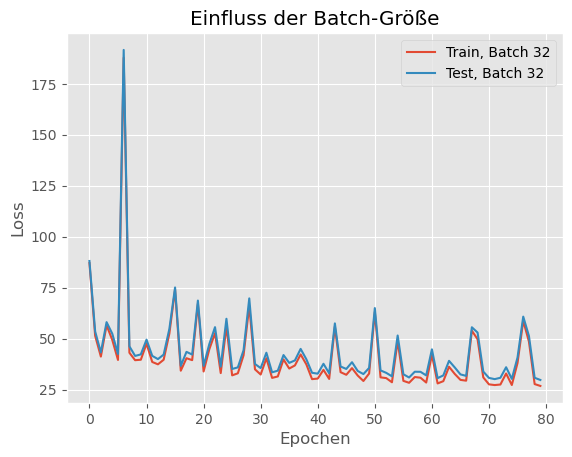

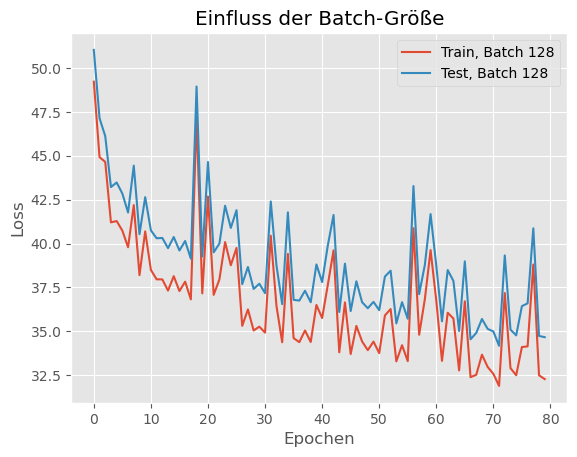

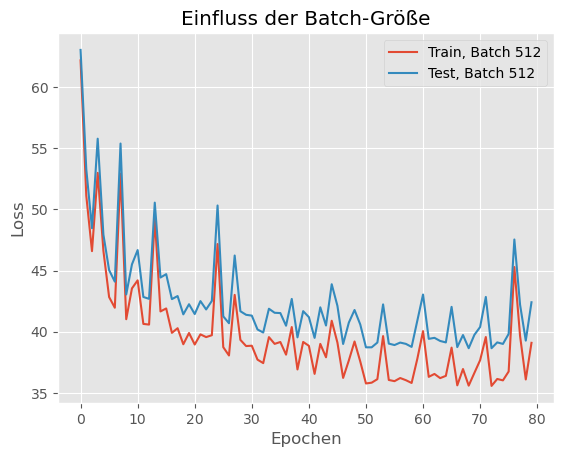

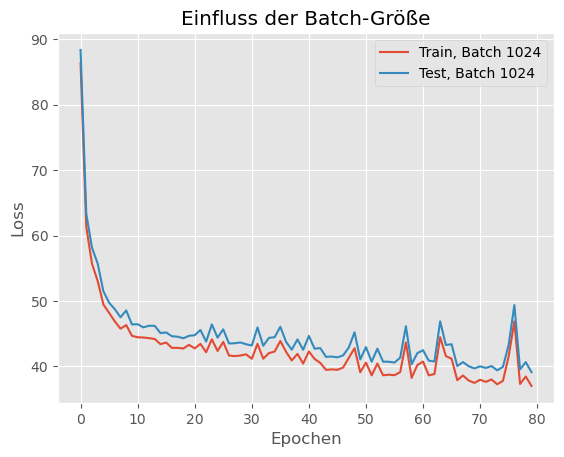

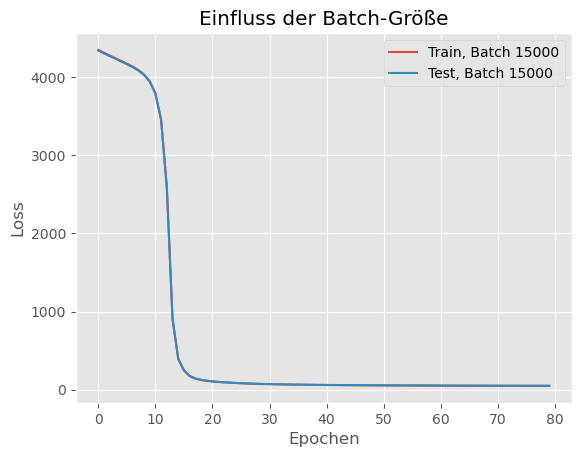

In [15]:
for batch_size in batch_sizes:
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
        
    
    model = Net()
            
    train_losses, test_losses = [], []
    for epoch in range(80):
        train(model, train_loader)
        train_loss = calc_loss(model, train_loader)
        test_loss = calc_loss(model, test_loader)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
            
        
            
    plt.plot(train_losses, label=f"Train, Batch {batch_size}")
    plt.plot(test_losses, label=f"Test, Batch {batch_size}")
    plt.legend()
    plt.xlabel("Epochen")
    plt.ylabel("Loss")
    plt.title("Einfluss der Batch-Größe")
    plt.show()

Durch die Schrittweise Vergrößerung der Batch Size wird deren Einfluss deutlich. 

Bei den kleineren Batch-Größen (32 & 128) ist der Loss-Verlauf sehr unruhig und fluktuiert stark. (auch nahe Epoche 50 noch Peaks auf 60 und Lows bei etwa 35 in einem Abstand von etwa 3 Epochen) 
Das liegt daran, dass viele kleine Mini-Batches jeweils leicht unterschiedliche Gradienten liefern. Dennoch sorgt dieses Rauschen dafür, dass wir nach einigen Epochen einen ganz guten Loss haben. Das kan z.B. daran liegen, dass das Rauschen dafür sorgt aus lokalen Minima auszubrechen.  

Bei den mittleren Batch-Größen (512 & 1024) sinkt der Loss wesentlich gleichmäßiger und die Lernkurven sind glatter. Das Model lernt effizienter. 

Bei der großen Batch-Größe von 15000 startet der Loss zwar sehr hoch aber sinkt auch extrem schnell ab. Nach einigen Epochen stabilisiert der Loss sich. Man trifft sicherere Entscheidungen desto größer die Batch-Größe ist, das Lernverhalten wird stabiler.

#### Teil 6: Different Learning Rate

In [16]:

def train_lr(network, train_loader, learning_rate):

  optimizer = optim.SGD(network.parameters(), lr=learning_rate) 
  criterion = nn.MSELoss() 
  # Loop over the batches
  for batch_idx, (data, target) in enumerate(train_loader):
        
    # --- Steps of the training of the net ---
    
    optimizer.zero_grad() 
    outputs = network(data)  
    loss = criterion(outputs, target.unsqueeze(1))  
    loss.backward()  
    optimizer.step() 

**Learning Rate: 0.0001**

In [17]:
learning_rate = 0.0001

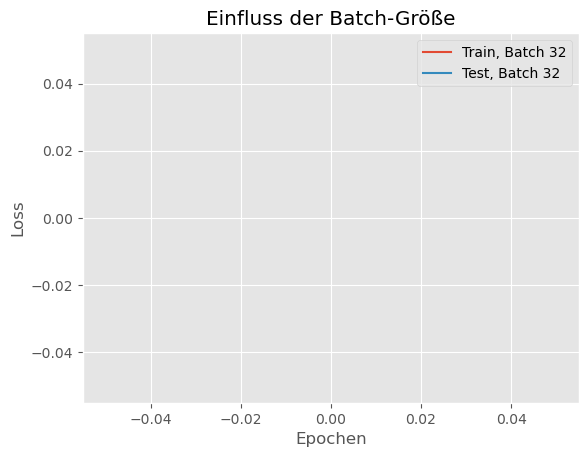

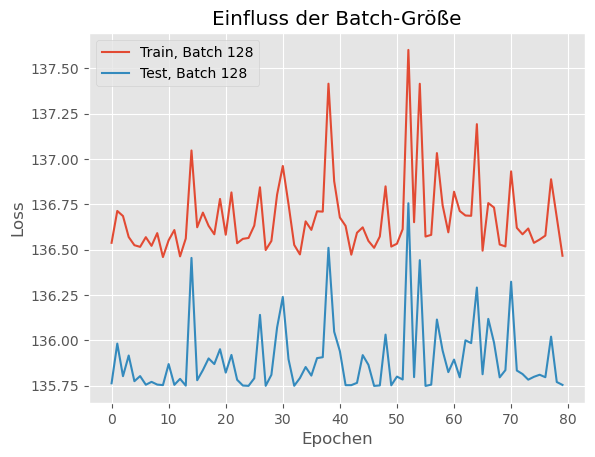

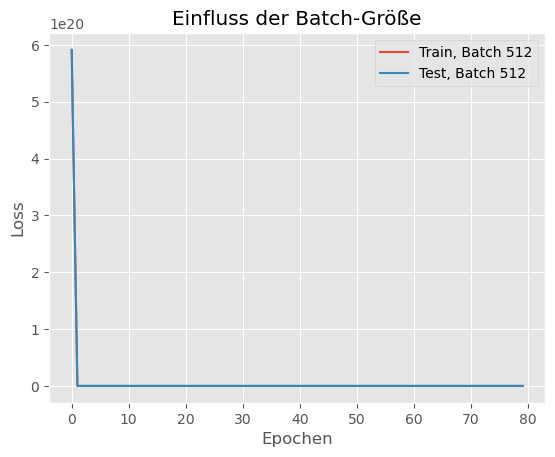

KeyboardInterrupt: 

In [22]:
for batch_size in batch_sizes:
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
        
    
    model = Net()
            
    train_losses, test_losses = [], []
    for epoch in range(80):
        train_lr(model, train_loader,learning_rate)
        train_loss = calc_loss(model, train_loader)
        test_loss = calc_loss(model, test_loader)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
            
        
            
    plt.plot(train_losses, label=f"Train, Batch {batch_size}")
    plt.plot(test_losses, label=f"Test, Batch {batch_size}")
    plt.legend()
    plt.xlabel("Epochen")
    plt.ylabel("Loss")
    plt.title("Einfluss der Batch-Größe")
    plt.show()

<b>Lernrate von 0.0001: </b> <br>
Die Lernkurven zeigen, dass der Loss über die Epochen hinweg langsamer abnimmt als mit einer größeren Lernrate, da die Gewichtsanpassungen in jedem Schritt kleiner sind und bei einem leicht höheren Loss bei Epoche 80 endet. Die Kurven fluktuieren auch nicht mehr so stark und zeigen eine stabilere Entwicklung des Losses. Das Modell lernt stabiler, erreciht aber einen etwas schlechteren Endloss. 




**Learning Rate: 0.1**

In [ ]:
learning_rate = 0.1

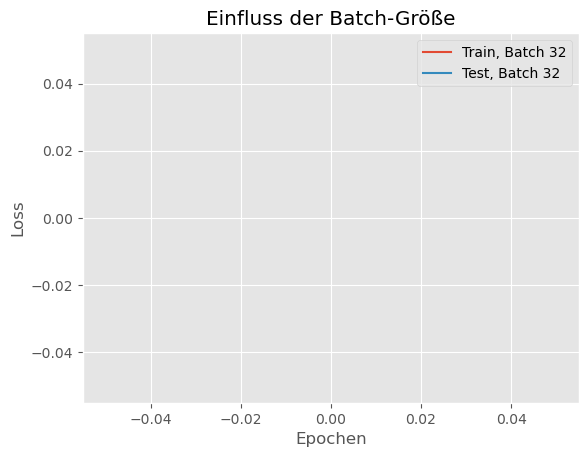

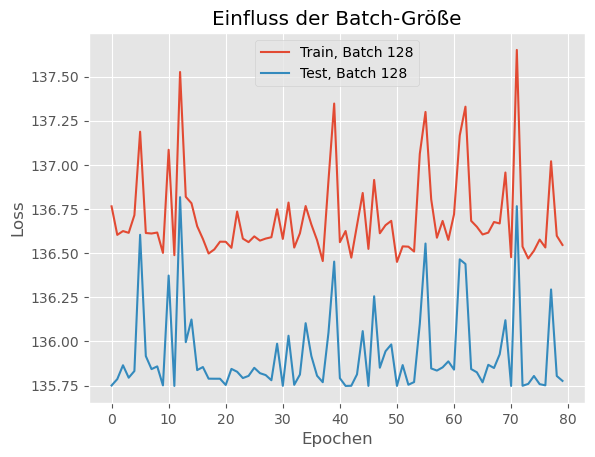

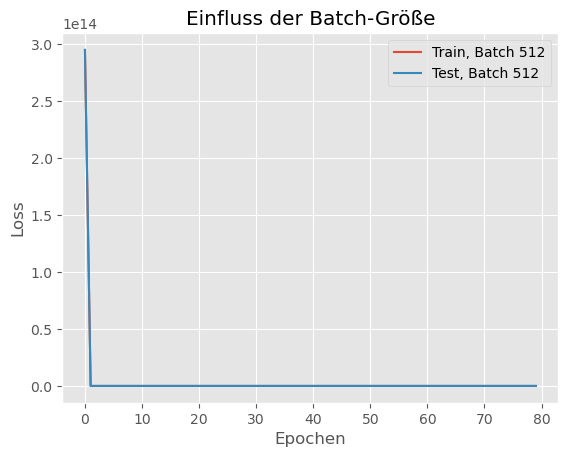

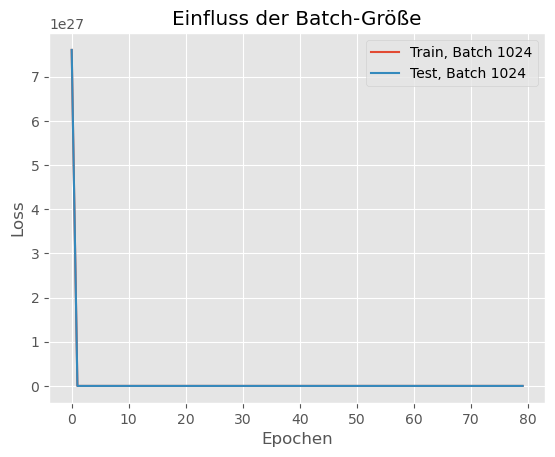

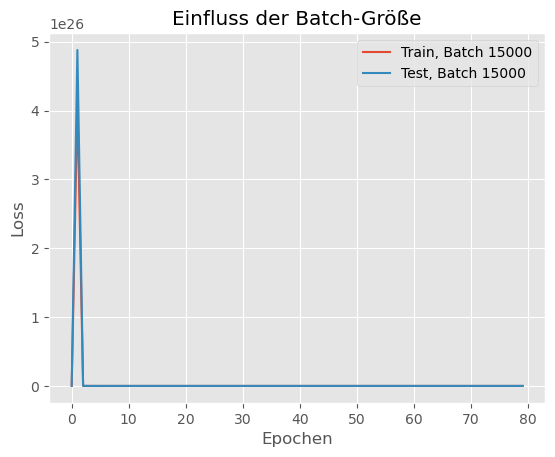

In [ ]:
for batch_size in batch_sizes:
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
        
    
    model = Net()
            
    train_losses, test_losses = [], []
    for epoch in range(80):
        train_lr(model, train_loader,learning_rate)
        train_loss = calc_loss(model, train_loader)
        test_loss = calc_loss(model, test_loader)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
            
        
            
    plt.plot(train_losses, label=f"Train, Batch {batch_size}")
    plt.plot(test_losses, label=f"Test, Batch {batch_size}")
    plt.legend()
    plt.xlabel("Epochen")
    plt.ylabel("Loss")
    plt.title("Einfluss der Batch-Größe")
    plt.show()

<b>Lernrate von 0.0001: </b> <br>
Hier sieht man, dass es keinen stabilen Abfall des Loss gibt, vor allem bei den kleineren Batch-Größen (z.B. 128 & 512) bleibt der Fehler fast konstant. Und bei der großen Batch-Größe von 15000 explodiert der Loss und sinkt danach relativ schnell wieder, was auf Instabilität hinweist. Also letztendlich führt die hohe Lernrate zu instabilem oder fehlerhaftem Training und man sollte die Lernrate kleiner machen, für eine stabiliere Konvergenz.

## Aufgabe 2 (Batch-Size und Learnrate) [6 Punkte]
Das folgende Bild zeigt die Lernkurve der Kosten beim Training eines Neuronalen Netzes. Betrachten Sie jetzt die Bilder a)-c). Wie haben sich jeweils Lernrate oder Batch-Größe geändert, so dass der Verlauf der Loss-Kurve jeweils den angegeben Verlauf hat? Begründen Sie Ihre Antwort.

![](./Bilder_Blatt1/A2_initialerLoss.png)



**Loss mit Änderungen in Batch-Größe oder Lernrate**

a) 

![](./Bilder_Blatt1/A2_loss_a.png)


b)

![](./Bilder_Blatt1/A2_loss_b.png)


c)

![](./Bilder_Blatt1/A2_loss_c.png)


## Lösung Aufgabe 2

a) größere Batchgröße -> weniger Fluktuation, etwas kleinere Learningrate -> langsamere/schlechtere Konvergenz <br>
b) sehr kleine Batchgröße -> viel Fluktuation<br>
c) größere Learningrate -> Divergenz<br>